<a href="https://colab.research.google.com/github/gazalssr/HerdNet/blob/main/demo_unsupervised_training2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Training

## Installations

In [42]:
# Check GPU
!nvidia-smi

Thu Aug 17 20:53:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [43]:
%%capture --no-stderr
# Install the dependencies
!pip install albumentations>=1.0.3
!pip install fiftyone>=0.14.3
!pip install hydra-core>=1.1.0
!pip install opencv-python>=4.5.1.48
!pip install pandas>=1.2.3
!pip install pillow>=8.2.0
!pip install scikit-image>=0.18.1
!pip install scikit-learn>=1.0.2
!pip install scipy>=1.6.2
!pip install wandb>=0.10.33

In [44]:
# Download and install the code
import sys

!git clone https://github.com/sfoucher/HerdNet
#!cd '/content/HerdNet' && python setup.py install
!pip install -e /content/HerdNet
sys.path.append('/content/HerdNet')

Cloning into 'HerdNet'...
remote: Enumerating objects: 388, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 388 (delta 18), reused 24 (delta 14), pack-reused 339
Receiving objects: 100% (388/388), 183.83 KiB | 5.74 MiB/s, done.
Resolving deltas: 100% (229/229), done.
Obtaining file:///content/HerdNet
  Preparing metadata (setup.py) ... done
  Running setup.py develop for animaloc


## Create datasets

In [ ]:
# Set the seed
from animaloc.utils.seed import set_seed

set_seed(9292)

In [45]:
# Create training  patches using the patcher tool
from animaloc.utils.useful_funcs import mkdir
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/TrainCAH/Train_CAH_1357.csv')
df = df.to_csv('/content/drive/MyDrive/TrainCAH/Train_CAH_1357.csv', index=False)
mkdir('/content/drive/MyDrive/Train_patches')
# mkdir('/content/Train_patches') # local directory
!python /content/HerdNet/tools/patcher.py /content/drive/MyDrive/TrainCAH/ 512 512 0 /content/drive/MyDrive/Train_patches -csv /content/drive/MyDrive/TrainCAH/Train_CAH_1357.csv -min 0.0 -all True
# !python /content/HerdNet/tools/patcher.py /content/drive/MyDrive/images/ 512 512 0 /content/drive/MyDrive/Train_patches -csv /content/drive/MyDrive/images/IMGcoors_FCH__GRP_4_01_.csv -min 0.0 -all True

Creating the buffer: 100% 13/13 [00:19<00:00,  1.53s/it]
Exporting patches: 100% 18/18 [02:33<00:00,  8.51s/it]


In [47]:
import csv, os
import pandas as pd
folder_path="/content/drive/MyDrive/Train_patches"
!cp "/content/drive/MyDrive/Train_patches/gt.csv" "/content/drive/MyDrive/GT"
gt_path='/content/drive/MyDrive/GT/gt.csv'
# gt_path='/content/drive/MyDrive/Train_patches/gt.csv'
# output_csv_path='/content/drive/MyDrive/Train_patches/gt_empty.csv'
file_ids = []
for filename in os.listdir(folder_path):
    # if os.path.isfile(os.path.join(folder_path, filename)):
    if filename.endswith('.jpg'):
        file_ids.append(filename)
# print(file_ids)
############# Save tpo csv ##################
data = {'file_id': file_ids}
df = pd.DataFrame(data)
FileIDs_csv_path = '/content/drive/MyDrive/FileList/file_ids.csv'
df.to_csv(FileIDs_csv_path, index=False)
F_D=pd.read_csv(FileIDs_csv_path)
gt=pd.read_csv(gt_path)
gt_images= gt['images'].tolist()
names_from_first_csv = F_D['file_id'].tolist()
print(names_from_first_csv)
file_names_not_in_second_csv = [file_id for file_id in names_from_first_csv if file_id not in gt_images]
data = {'Empty patches': file_names_not_in_second_csv}
df_output = pd.DataFrame(data)
output_csv_path='/content/drive/MyDrive/GT/gt_empty.csv'
df_output.to_csv(output_csv_path, index=False)

['CAH_GRP_5_90mm_99.jpg', 'CAH_GRP_5_90mm_101.jpg', 'CAH_GRP_5_90mm_102.jpg', 'CAH_GRP_5_90mm_104.jpg', 'CAH_GRP_5_90mm_103.jpg', 'CAH_GRP_5_90mm_105.jpg', 'CAH_GRP_5_90mm_106.jpg', 'CAH_GRP_5_90mm_108.jpg', 'CAH_GRP_5_90mm_107.jpg', 'CAH_GRP_5_90mm_109.jpg', 'CAH_GRP_5_90mm_110.jpg', 'CAH_GRP_5_90mm_111.jpg', 'CAH_GRP_5_90mm_112.jpg', 'CAH_GRP_5_90mm_113.jpg', 'CAH_GRP_5_90mm_115.jpg', 'CAH_GRP_5_90mm_114.jpg', 'CAH_GRP_5_90mm_117.jpg', 'CAH_GRP_5_90mm_116.jpg', 'CAH_GRP_5_90mm_118.jpg', 'CAH_GRP_5_90mm_119.jpg', 'CAH_GRP_5_90mm_120.jpg', 'CAH_GRP_5_90mm_121.jpg', 'CAH_GRP_5_90mm_122.jpg', 'CAH_GRP_5_90mm_123.jpg', 'CAH_GRP_5_90mm_124.jpg', 'CAH_GRP_5_90mm_125.jpg', 'CAH_GRP_5_90mm_126.jpg', 'CAH_GRP_5_90mm_128.jpg', 'CAH_GRP_5_90mm_127.jpg', 'CAH_GRP_5_90mm_129.jpg', 'CAH_GRP_5_90mm_130.jpg', 'CAH_GRP_5_90mm_131.jpg', 'CAH_GRP_5_90mm_132.jpg', 'CAH_GRP_5_90mm_133.jpg', 'CAH_GRP_5_90mm_134.jpg', 'CAH_GRP_5_90mm_135.jpg', 'CAH_GRP_5_90mm_136.jpg', 'CAH_GRP_5_90mm_137.jpg', 'CAH_GRP_5_9

In [ ]:
!gdown link_id -O /content/drive/MyDrive/GT/gt_empty.csv.zip
!gdown link_id -O /content/non_empty.zip
!unzip /content/empty.zip

In [35]:
output_csv_path='/content/drive/MyDrive/GT/gt_empty.csv'
df_output.to_csv(output_csv_path, index=False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create validation patches
mkdir('/content/drive/MyDrive/val_patches')
# mkdir('/content/val_patches')
!python /content/HerdNet/tools/patcher.py /content/drive/MyDrive/ValCAH/ 512 512 256 /content/drive/MyDrive/val_patches -csv /content/drive/MyDrive/ValCAH/VAL_CAH_6A_SE2.csv -min 0.0 -all True

NameError: ignored

In [ ]:
#Create test patches
from animaloc.utils.useful_funcs import mkdir
import pandas as pd
mkdir('/content/drive/MyDrive/test_patches')
# mkdir('/content/test_patches')
!python /content/HerdNet/tools/patcher.py /content/drive/MyDrive/TestCAH 512 512 256 /content/drive/MyDrive/test_patches -csv /content/drive/MyDrive/TestCAH/Test_FCH_gr7_00.csv -min 0.0 -all True

Creating the buffer: 100% 2/2 [00:05<00:00,  2.84s/it]
Exporting patches: 100% 2/2 [00:43<00:00, 21.86s/it]


In [10]:
# Training, validation and test datasets
import albumentations as A

from animaloc.datasets import FolderDataset
from animaloc.data.transforms import MultiTransformsWrapper, DownSample, PointsToMask, FIDT, AnimalDensity

patch_size = 512
num_classes = 2
down_ratio = 2
binary= False

dataset = FolderDataset(
    csv_file = '/content/drive/MyDrive/Train_patches/gt.csv',
    root_dir = '/content/drive/MyDrive/Train_patches',
    albu_transforms = [
        # A.VerticalFlip(p=0.5),
        # A.HorizontalFlip(p=0.5),
        # A.RandomRotate90(p=0.5),
        # A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.2),
        # A.Blur(blur_limit=15, p=0.2),
        # A.Normalize(p=1.0)
        ],
    end_transforms = [MultiTransformsWrapper([
        AnimalDensity(),
        ])]
    )

# val_dataset = FolderDataset(
#     csv_file = '/content/drive/MyDrive/val_patches/gt.csv',
#     root_dir = '/content/drive/MyDrive/val_patches',
#     end_transforms = [MultiTransformsWrapper([
#         AnimalDensity(),
#         ])]
#      )

# test_dataset = FolderDataset(
#     csv_file = '/content/drive/MyDrive/test_patches/gt.csv',
#     root_dir = '/content/drive/MyDrive/test_patches',
#     albu_transforms = [
#         # A.VerticalFlip(p=0.5),
#         # A.HorizontalFlip(p=0.5),
#         # A.RandomRotate90(p=0.5),
#         # A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.2),
#         # A.Blur(blur_limit=15, p=0.2),
#         # A.Normalize(p=1.0)
#         ],
#     end_transforms = [MultiTransformsWrapper([
#         AnimalDensity(),
#         ])]
#     )

In [ ]:
import torch
from torch.utils.data import random_split

# Assuming 'dataset' is your dataset

# Compute the lengths of the splits
lengths = [int(len(dataset)*0.9), len(dataset) - int(len(dataset)*0.9)]

# Use random_split to get the datasets
train_dataset, val_dataset = random_split(dataset, lengths) # not optimal here, does not take into account inbalancing

print(len(train_dataset))

14738


Stratified  split (not sure it's the best way)

```
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch

targets = [dataset.data[dataset.data['images']==dataset._ordered_img_names[0]]['from_folder'].values[0] for img in dataset._ordered_img_names]

from collections import Counter
Counter(targets)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

for train_index, val_index in sss.split(np.zeros(len(targets)), targets):
  train_dataset= torch.utils.data.Subset(dataset, train_index)
  val_dataset= torch.utils.data.Subset(dataset, val_index)
```



Class distribution (0= empty, 1=non-empty)

In [ ]:
dataset.data['from_folder'].value_counts(0)

In [ ]:

# Dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE= 32
train_dataloader = DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, num_workers= 2, shuffle= True)

val_dataloader = DataLoader(dataset = val_dataset, batch_size = BATCH_SIZE, num_workers= 2, shuffle= False)

test_dataloader = DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, num_workers= 2, shuffle= False)

## Visualisation des batch

0
0
0
62
2
0
45
24


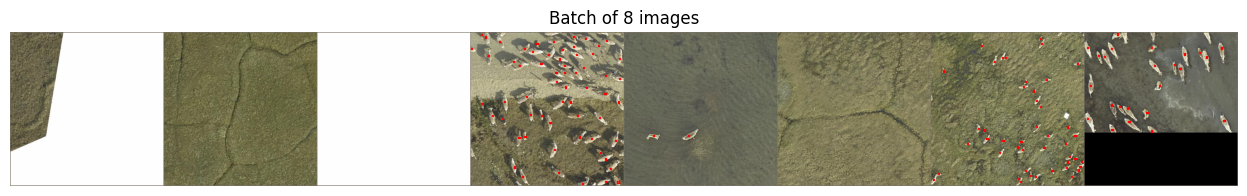

In [ ]:
%matplotlib inline
# Showing some samples of patches and the annotations
import matplotlib.pyplot as plt
from animaloc.datasets import CSVDataset
from animaloc.data.batch_utils import show_batch, collate_fn
from torch.utils.data import DataLoader
import torch
import albumentations as A
batch_size = 8
csv_path = '/content/drive/MyDrive/Train_patches/gt.csv'
image_path = '/content/drive/MyDrive/Train_patches'
dataset_all = FolderDataset(csv_path, image_path, [A.Normalize()])
dataloader = DataLoader(dataset_all, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)

sample_batch = next(iter(dataloader))
for i in range(len(sample_batch[1])):
  points = sample_batch[1][i]['points'].numpy()
  print(len(sample_batch[1][i]['labels']))
  bbox= []
  for pt in points:
      bbox.append([pt[0]-2,pt[1]-2,pt[0]+2,pt[1]+2])
  #print(len(sample_batch[1][i]['labels']))
  sample_batch[1][i]['annotations']=torch.tensor(bbox)
plt.figure(figsize=(16,2))
show_batch(sample_batch)

In [ ]:
sample_batch[1][0]['labels']

tensor([], dtype=torch.int64)

## Define HerdNet for training

In [ ]:
from animaloc.models import DLAEncoder
from torch import Tensor
from animaloc.models import LossWrapper
from animaloc.train.losses import FocalLoss
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, L1Loss

num_classes=2
dla_encoder = DLAEncoder(num_classes=num_classes).cuda()

image= torch.ones([1,3,512,512]).cuda()
print(torch.cuda.mem_get_info())

cls= dla_encoder(image)
weight = Tensor([0.1, 1.0, 2.0, 1.0, 6.0, 12.0, 1.0]).cuda()
if binary:
  losses = [
      {'loss': BCEWithLogitsLoss(reduction='mean'), 'idx': 0, 'idy': 0, 'lambda': 1.0, 'name': 'bce_loss'},
      ]
else:
  losses = [
      {'loss': L1Loss(reduction='mean'), 'idx': 0, 'idy': 0, 'lambda': 1.0, 'name': 'bce_loss'},
      ]
dla_encoder = LossWrapper(dla_encoder, losses=losses)

Downloading: "http://dl.yf.io/dla/models/imagenet/dla34-ba72cf86.pth" to /root/.cache/torch/hub/checkpoints/dla34-ba72cf86.pth
100%|██████████| 60.3M/60.3M [00:05<00:00, 10.8MB/s]


(15653994496, 15835398144)


## Create the Trainer

In [ ]:
from torch.optim import Adam

from animaloc.train import Trainer
from animaloc.eval import ImageLevelMetrics, HerdNetStitcher, HerdNetEvaluator, TileEvaluator
from animaloc.utils.useful_funcs import mkdir

work_dir = '/content/output'
mkdir(work_dir)

lr = 1e-4
weight_decay = 1e-3
epochs =20

optimizer = Adam(params=dla_encoder.parameters(), lr=lr, weight_decay=weight_decay)

metrics = ImageLevelMetrics(num_classes=num_classes)

evaluator = TileEvaluator(
    model=dla_encoder,
    dataloader=val_dataloader,
    metrics=metrics,
    stitcher=None,
    work_dir=work_dir,
    header='validation',
    )

trainer = Trainer(
    model=dla_encoder,
    train_dataloader=train_dataloader,
    optimizer=optimizer,
    num_epochs=epochs,
    evaluator=evaluator,             # metric evaluation
    #val_dataloader= val_dataloader, # loss evaluation
    work_dir=work_dir
    )

## Start training

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb
if wandb.run is not None:
  wandb.finish()
wandb.init(project="herdnet")

wandb: Currently logged in as: ghazaleh-serati (wildlife-monitoring). Use `wandb login --relogin` to force relogin


In [ ]:
trainer.start(warmup_iters=100, checkpoints='best', select='max', validate_on='accuracy', wandb_flag =True)

INFO:20230807_training:[TRAINING] - Epoch: [1] [  1/461] eta: 2:10:54 lr: 0.000002 loss: 0.2497 (0.2497) bce_loss: 0.2497 (0.2497) time: 17.0387 data: 15.4526 max mem: 8086


[TRAINING] - Epoch: [1] [  1/461] eta: 2:10:54 lr: 0.000002 loss: 0.2497 (0.2497) bce_loss: 0.2497 (0.2497) time: 17.0387 data: 15.4526 max mem: 8086


INFO:20230807_training:[TRAINING] - Epoch: [1] [ 51/461] eta: 0:48:08 lr: 0.000051 loss: 0.1121 (0.1416) bce_loss: 0.1121 (0.1416) time: 6.7583 data: 5.8334 max mem: 8206


[TRAINING] - Epoch: [1] [ 51/461] eta: 0:48:08 lr: 0.000051 loss: 0.1121 (0.1416) bce_loss: 0.1121 (0.1416) time: 6.7583 data: 5.8334 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [101/461] eta: 0:41:57 lr: 0.000100 loss: 0.1081 (0.1237) bce_loss: 0.1081 (0.1237) time: 7.0049 data: 6.0627 max mem: 8206


[TRAINING] - Epoch: [1] [101/461] eta: 0:41:57 lr: 0.000100 loss: 0.1081 (0.1237) bce_loss: 0.1081 (0.1237) time: 7.0049 data: 6.0627 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [151/461] eta: 0:36:06 lr: 0.000100 loss: 0.0943 (0.1174) bce_loss: 0.0943 (0.1174) time: 6.8960 data: 5.9441 max mem: 8206


[TRAINING] - Epoch: [1] [151/461] eta: 0:36:06 lr: 0.000100 loss: 0.0943 (0.1174) bce_loss: 0.0943 (0.1174) time: 6.8960 data: 5.9441 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [201/461] eta: 0:30:14 lr: 0.000100 loss: 0.0806 (0.1111) bce_loss: 0.0806 (0.1111) time: 6.8563 data: 5.8980 max mem: 8206


[TRAINING] - Epoch: [1] [201/461] eta: 0:30:14 lr: 0.000100 loss: 0.0806 (0.1111) bce_loss: 0.0806 (0.1111) time: 6.8563 data: 5.8980 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [251/461] eta: 0:24:23 lr: 0.000100 loss: 0.0806 (0.1036) bce_loss: 0.0806 (0.1036) time: 6.8013 data: 5.8780 max mem: 8206


[TRAINING] - Epoch: [1] [251/461] eta: 0:24:23 lr: 0.000100 loss: 0.0806 (0.1036) bce_loss: 0.0806 (0.1036) time: 6.8013 data: 5.8780 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [301/461] eta: 0:18:37 lr: 0.000100 loss: 0.0509 (0.0980) bce_loss: 0.0509 (0.0980) time: 7.0166 data: 6.0960 max mem: 8206


[TRAINING] - Epoch: [1] [301/461] eta: 0:18:37 lr: 0.000100 loss: 0.0509 (0.0980) bce_loss: 0.0509 (0.0980) time: 7.0166 data: 6.0960 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [351/461] eta: 0:12:48 lr: 0.000100 loss: 0.0412 (0.0916) bce_loss: 0.0412 (0.0916) time: 6.8171 data: 5.8964 max mem: 8206


[TRAINING] - Epoch: [1] [351/461] eta: 0:12:48 lr: 0.000100 loss: 0.0412 (0.0916) bce_loss: 0.0412 (0.0916) time: 6.8171 data: 5.8964 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [401/461] eta: 0:07:01 lr: 0.000100 loss: 0.0481 (0.0859) bce_loss: 0.0481 (0.0859) time: 6.8215 data: 5.8995 max mem: 8206


[TRAINING] - Epoch: [1] [401/461] eta: 0:07:01 lr: 0.000100 loss: 0.0481 (0.0859) bce_loss: 0.0481 (0.0859) time: 6.8215 data: 5.8995 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [451/461] eta: 0:01:15 lr: 0.000100 loss: 0.0561 (0.0820) bce_loss: 0.0561 (0.0820) time: 6.8113 data: 5.8900 max mem: 8206


[TRAINING] - Epoch: [1] [451/461] eta: 0:01:15 lr: 0.000100 loss: 0.0561 (0.0820) bce_loss: 0.0561 (0.0820) time: 6.8113 data: 5.8900 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [1] [461/461] eta: 0:00:06 lr: 0.000100 loss: 0.0687 (0.0819) bce_loss: 0.0687 (0.0819) time: 6.8337 data: 5.9275 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [1] Total time: 0:52:55 (6.8884 s / it)


[TRAINING] - Epoch: [1] [461/461] eta: 0:00:06 lr: 0.000100 loss: 0.0687 (0.0819) bce_loss: 0.0687 (0.0819) time: 6.8337 data: 5.9275 max mem: 8206
[TRAINING] - Epoch: [1] Total time: 0:52:55 (6.8884 s / it)
[TRAINING] - Epoch: [1] mean loss: 0.0819


INFO:20230807_validation:[VALIDATION] - Epoch: [1] [ 1/52] eta: 0:11:44 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 13.5563 data: 13.2301 max mem: 8206


[VALIDATION] - Epoch: [1] [ 1/52] eta: 0:11:44 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 13.5563 data: 13.2301 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [1] [11/52] eta: 0:05:06 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 7.2950 data: 6.9791 max mem: 8206


[VALIDATION] - Epoch: [1] [11/52] eta: 0:05:06 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 7.2950 data: 6.9791 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [1] [21/52] eta: 0:03:46 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.7633 data: 6.4381 max mem: 8206


[VALIDATION] - Epoch: [1] [21/52] eta: 0:03:46 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.7633 data: 6.4381 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [1] [31/52] eta: 0:02:34 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.8962 data: 6.5607 max mem: 8206


[VALIDATION] - Epoch: [1] [31/52] eta: 0:02:34 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.8962 data: 6.5607 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [1] [41/52] eta: 0:01:23 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.8183 data: 6.4867 max mem: 8206


[VALIDATION] - Epoch: [1] [41/52] eta: 0:01:23 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.8183 data: 6.4867 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [1] [51/52] eta: 0:00:13 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.8187 data: 6.4890 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [1] [52/52] eta: 0:00:06 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.6720 data: 6.3549 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [1] Total time: 0:05:54 (6.8207 s / it)


[VALIDATION] - Epoch: [1] [51/52] eta: 0:00:13 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.8187 data: 6.4890 max mem: 8206
[VALIDATION] - Epoch: [1] [52/52] eta: 0:00:06 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 6.6720 data: 6.3549 max mem: 8206
[VALIDATION] - Epoch: [1] Total time: 0:05:54 (6.8207 s / it)
[VALIDATION] - Epoch: [1] accuracy: 0.0568
Best model saved - Epoch 1 - Validation value: 0.056777


INFO:20230807_training:[TRAINING] - Epoch: [2] [  1/461] eta: 0:12:32 lr: 0.000100 loss: 0.0687 (0.0820) bce_loss: 0.0687 (0.0820) time: 1.6330 data: 0.7289 max mem: 8206


[TRAINING] - Epoch: [2] [  1/461] eta: 0:12:32 lr: 0.000100 loss: 0.0687 (0.0820) bce_loss: 0.0687 (0.0820) time: 1.6330 data: 0.7289 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [ 51/461] eta: 0:06:23 lr: 0.000100 loss: 0.0418 (0.0797) bce_loss: 0.0418 (0.0797) time: 0.9253 data: 0.0189 max mem: 8206


[TRAINING] - Epoch: [2] [ 51/461] eta: 0:06:23 lr: 0.000100 loss: 0.0418 (0.0797) bce_loss: 0.0418 (0.0797) time: 0.9253 data: 0.0189 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [101/461] eta: 0:05:38 lr: 0.000100 loss: 0.0432 (0.0771) bce_loss: 0.0432 (0.0771) time: 0.9468 data: 0.0193 max mem: 8206


[TRAINING] - Epoch: [2] [101/461] eta: 0:05:38 lr: 0.000100 loss: 0.0432 (0.0771) bce_loss: 0.0432 (0.0771) time: 0.9468 data: 0.0193 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [151/461] eta: 0:04:52 lr: 0.000100 loss: 0.0508 (0.0745) bce_loss: 0.0508 (0.0745) time: 0.9481 data: 0.0197 max mem: 8206


[TRAINING] - Epoch: [2] [151/461] eta: 0:04:52 lr: 0.000100 loss: 0.0508 (0.0745) bce_loss: 0.0508 (0.0745) time: 0.9481 data: 0.0197 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [201/461] eta: 0:04:06 lr: 0.000100 loss: 0.0548 (0.0730) bce_loss: 0.0548 (0.0730) time: 0.9520 data: 0.0213 max mem: 8206


[TRAINING] - Epoch: [2] [201/461] eta: 0:04:06 lr: 0.000100 loss: 0.0548 (0.0730) bce_loss: 0.0548 (0.0730) time: 0.9520 data: 0.0213 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [251/461] eta: 0:03:19 lr: 0.000100 loss: 0.0558 (0.0721) bce_loss: 0.0558 (0.0721) time: 0.9517 data: 0.0223 max mem: 8206


[TRAINING] - Epoch: [2] [251/461] eta: 0:03:19 lr: 0.000100 loss: 0.0558 (0.0721) bce_loss: 0.0558 (0.0721) time: 0.9517 data: 0.0223 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0386 (0.0706) bce_loss: 0.0386 (0.0706) time: 0.9527 data: 0.0232 max mem: 8206


[TRAINING] - Epoch: [2] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0386 (0.0706) bce_loss: 0.0386 (0.0706) time: 0.9527 data: 0.0232 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0428 (0.0689) bce_loss: 0.0428 (0.0689) time: 0.9541 data: 0.0234 max mem: 8206


[TRAINING] - Epoch: [2] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0428 (0.0689) bce_loss: 0.0428 (0.0689) time: 0.9541 data: 0.0234 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0391 (0.0675) bce_loss: 0.0391 (0.0675) time: 0.9494 data: 0.0210 max mem: 8206


[TRAINING] - Epoch: [2] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0391 (0.0675) bce_loss: 0.0391 (0.0675) time: 0.9494 data: 0.0210 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0461 (0.0663) bce_loss: 0.0461 (0.0663) time: 0.9519 data: 0.0231 max mem: 8206


[TRAINING] - Epoch: [2] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0461 (0.0663) bce_loss: 0.0461 (0.0663) time: 0.9519 data: 0.0231 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [2] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0383 (0.0660) bce_loss: 0.0383 (0.0660) time: 0.9352 data: 0.0224 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [2] Total time: 0:07:16 (0.9477 s / it)


[TRAINING] - Epoch: [2] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0383 (0.0660) bce_loss: 0.0383 (0.0660) time: 0.9352 data: 0.0224 max mem: 8206
[TRAINING] - Epoch: [2] Total time: 0:07:16 (0.9477 s / it)
[TRAINING] - Epoch: [2] mean loss: 0.0500


INFO:20230807_validation:[VALIDATION] - Epoch: [2] [ 1/52] eta: 0:00:50 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9628 data: 0.7018 max mem: 8206


[VALIDATION] - Epoch: [2] [ 1/52] eta: 0:00:50 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9628 data: 0.7018 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [2] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3920 data: 0.1122 max mem: 8206


[VALIDATION] - Epoch: [2] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3920 data: 0.1122 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [2] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3317 data: 0.0480 max mem: 8206


[VALIDATION] - Epoch: [2] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3317 data: 0.0480 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [2] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3535 data: 0.0659 max mem: 8206


[VALIDATION] - Epoch: [2] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3535 data: 0.0659 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [2] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3824 data: 0.0936 max mem: 8206


[VALIDATION] - Epoch: [2] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3824 data: 0.0936 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [2] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3511 data: 0.0661 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [2] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3393 data: 0.0656 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [2] Total time: 0:00:18 (0.3571 s / it)


[VALIDATION] - Epoch: [2] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3511 data: 0.0661 max mem: 8206
[VALIDATION] - Epoch: [2] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3393 data: 0.0656 max mem: 8206
[VALIDATION] - Epoch: [2] Total time: 0:00:18 (0.3571 s / it)
[VALIDATION] - Epoch: [2] accuracy: 0.8822
Best model saved - Epoch 2 - Validation value: 0.882173


INFO:20230807_training:[TRAINING] - Epoch: [3] [  1/461] eta: 0:16:31 lr: 0.000100 loss: 0.0359 (0.0659) bce_loss: 0.0359 (0.0659) time: 2.1510 data: 1.1591 max mem: 8206


[TRAINING] - Epoch: [3] [  1/461] eta: 0:16:31 lr: 0.000100 loss: 0.0359 (0.0659) bce_loss: 0.0359 (0.0659) time: 2.1510 data: 1.1591 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [ 51/461] eta: 0:06:39 lr: 0.000100 loss: 0.0553 (0.0651) bce_loss: 0.0553 (0.0651) time: 0.9504 data: 0.0209 max mem: 8206


[TRAINING] - Epoch: [3] [ 51/461] eta: 0:06:39 lr: 0.000100 loss: 0.0553 (0.0651) bce_loss: 0.0553 (0.0651) time: 0.9504 data: 0.0209 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [101/461] eta: 0:05:46 lr: 0.000100 loss: 0.0388 (0.0640) bce_loss: 0.0388 (0.0640) time: 0.9486 data: 0.0213 max mem: 8206


[TRAINING] - Epoch: [3] [101/461] eta: 0:05:46 lr: 0.000100 loss: 0.0388 (0.0640) bce_loss: 0.0388 (0.0640) time: 0.9486 data: 0.0213 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [151/461] eta: 0:04:57 lr: 0.000100 loss: 0.0399 (0.0629) bce_loss: 0.0399 (0.0629) time: 0.9505 data: 0.0202 max mem: 8206


[TRAINING] - Epoch: [3] [151/461] eta: 0:04:57 lr: 0.000100 loss: 0.0399 (0.0629) bce_loss: 0.0399 (0.0629) time: 0.9505 data: 0.0202 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [201/461] eta: 0:04:09 lr: 0.000100 loss: 0.0370 (0.0619) bce_loss: 0.0370 (0.0619) time: 0.9515 data: 0.0217 max mem: 8206


[TRAINING] - Epoch: [3] [201/461] eta: 0:04:09 lr: 0.000100 loss: 0.0370 (0.0619) bce_loss: 0.0370 (0.0619) time: 0.9515 data: 0.0217 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [251/461] eta: 0:03:21 lr: 0.000100 loss: 0.0400 (0.0613) bce_loss: 0.0400 (0.0613) time: 0.9478 data: 0.0193 max mem: 8206


[TRAINING] - Epoch: [3] [251/461] eta: 0:03:21 lr: 0.000100 loss: 0.0400 (0.0613) bce_loss: 0.0400 (0.0613) time: 0.9478 data: 0.0193 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [301/461] eta: 0:02:33 lr: 0.000100 loss: 0.0287 (0.0603) bce_loss: 0.0287 (0.0603) time: 0.9506 data: 0.0217 max mem: 8206


[TRAINING] - Epoch: [3] [301/461] eta: 0:02:33 lr: 0.000100 loss: 0.0287 (0.0603) bce_loss: 0.0287 (0.0603) time: 0.9506 data: 0.0217 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0328 (0.0593) bce_loss: 0.0328 (0.0593) time: 0.9492 data: 0.0205 max mem: 8206


[TRAINING] - Epoch: [3] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0328 (0.0593) bce_loss: 0.0328 (0.0593) time: 0.9492 data: 0.0205 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [401/461] eta: 0:00:58 lr: 0.000100 loss: 0.0302 (0.0583) bce_loss: 0.0302 (0.0583) time: 0.9488 data: 0.0202 max mem: 8206


[TRAINING] - Epoch: [3] [401/461] eta: 0:00:58 lr: 0.000100 loss: 0.0302 (0.0583) bce_loss: 0.0302 (0.0583) time: 0.9488 data: 0.0202 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0388 (0.0577) bce_loss: 0.0388 (0.0577) time: 0.9511 data: 0.0219 max mem: 8206


[TRAINING] - Epoch: [3] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0388 (0.0577) bce_loss: 0.0388 (0.0577) time: 0.9511 data: 0.0219 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [3] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0336 (0.0576) bce_loss: 0.0336 (0.0576) time: 0.9334 data: 0.0212 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [3] Total time: 0:07:18 (0.9519 s / it)


[TRAINING] - Epoch: [3] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0336 (0.0576) bce_loss: 0.0336 (0.0576) time: 0.9334 data: 0.0212 max mem: 8206
[TRAINING] - Epoch: [3] Total time: 0:07:18 (0.9519 s / it)
[TRAINING] - Epoch: [3] mean loss: 0.0409


INFO:20230807_validation:[VALIDATION] - Epoch: [3] [ 1/52] eta: 0:00:49 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9607 data: 0.6945 max mem: 8206


[VALIDATION] - Epoch: [3] [ 1/52] eta: 0:00:49 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9607 data: 0.6945 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [3] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3942 data: 0.1129 max mem: 8206


[VALIDATION] - Epoch: [3] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3942 data: 0.1129 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [3] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3469 data: 0.0621 max mem: 8206


[VALIDATION] - Epoch: [3] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3469 data: 0.0621 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [3] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3779 data: 0.0880 max mem: 8206


[VALIDATION] - Epoch: [3] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3779 data: 0.0880 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [3] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3952 data: 0.1065 max mem: 8206


[VALIDATION] - Epoch: [3] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3952 data: 0.1065 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [3] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3540 data: 0.0689 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [3] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3307 data: 0.0565 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [3] Total time: 0:00:19 (0.3676 s / it)


[VALIDATION] - Epoch: [3] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3540 data: 0.0689 max mem: 8206
[VALIDATION] - Epoch: [3] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3307 data: 0.0565 max mem: 8206
[VALIDATION] - Epoch: [3] Total time: 0:00:19 (0.3676 s / it)
[VALIDATION] - Epoch: [3] accuracy: 0.0488


INFO:20230807_training:[TRAINING] - Epoch: [4] [  1/461] eta: 0:13:03 lr: 0.000100 loss: 0.0315 (0.0576) bce_loss: 0.0315 (0.0576) time: 1.6988 data: 0.7643 max mem: 8206


[TRAINING] - Epoch: [4] [  1/461] eta: 0:13:03 lr: 0.000100 loss: 0.0315 (0.0576) bce_loss: 0.0315 (0.0576) time: 1.6988 data: 0.7643 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [ 51/461] eta: 0:06:36 lr: 0.000100 loss: 0.0396 (0.0571) bce_loss: 0.0396 (0.0571) time: 0.9503 data: 0.0203 max mem: 8206


[TRAINING] - Epoch: [4] [ 51/461] eta: 0:06:36 lr: 0.000100 loss: 0.0396 (0.0571) bce_loss: 0.0396 (0.0571) time: 0.9503 data: 0.0203 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [101/461] eta: 0:05:45 lr: 0.000100 loss: 0.0255 (0.0564) bce_loss: 0.0255 (0.0564) time: 0.9492 data: 0.0214 max mem: 8206


[TRAINING] - Epoch: [4] [101/461] eta: 0:05:45 lr: 0.000100 loss: 0.0255 (0.0564) bce_loss: 0.0255 (0.0564) time: 0.9492 data: 0.0214 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0357 (0.0560) bce_loss: 0.0357 (0.0560) time: 0.9490 data: 0.0199 max mem: 8206


[TRAINING] - Epoch: [4] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0357 (0.0560) bce_loss: 0.0357 (0.0560) time: 0.9490 data: 0.0199 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0247 (0.0554) bce_loss: 0.0247 (0.0554) time: 0.9505 data: 0.0216 max mem: 8206


[TRAINING] - Epoch: [4] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0247 (0.0554) bce_loss: 0.0247 (0.0554) time: 0.9505 data: 0.0216 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [251/461] eta: 0:03:21 lr: 0.000100 loss: 0.0317 (0.0548) bce_loss: 0.0317 (0.0548) time: 0.9499 data: 0.0222 max mem: 8206


[TRAINING] - Epoch: [4] [251/461] eta: 0:03:21 lr: 0.000100 loss: 0.0317 (0.0548) bce_loss: 0.0317 (0.0548) time: 0.9499 data: 0.0222 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [301/461] eta: 0:02:33 lr: 0.000100 loss: 0.0466 (0.0543) bce_loss: 0.0466 (0.0543) time: 0.9492 data: 0.0218 max mem: 8206


[TRAINING] - Epoch: [4] [301/461] eta: 0:02:33 lr: 0.000100 loss: 0.0466 (0.0543) bce_loss: 0.0466 (0.0543) time: 0.9492 data: 0.0218 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0329 (0.0540) bce_loss: 0.0329 (0.0540) time: 0.9486 data: 0.0213 max mem: 8206


[TRAINING] - Epoch: [4] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0329 (0.0540) bce_loss: 0.0329 (0.0540) time: 0.9486 data: 0.0213 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [401/461] eta: 0:00:58 lr: 0.000100 loss: 0.0419 (0.0537) bce_loss: 0.0419 (0.0537) time: 0.9500 data: 0.0211 max mem: 8206


[TRAINING] - Epoch: [4] [401/461] eta: 0:00:58 lr: 0.000100 loss: 0.0419 (0.0537) bce_loss: 0.0419 (0.0537) time: 0.9500 data: 0.0211 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0405 (0.0535) bce_loss: 0.0405 (0.0535) time: 0.9511 data: 0.0222 max mem: 8206


[TRAINING] - Epoch: [4] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0405 (0.0535) bce_loss: 0.0405 (0.0535) time: 0.9511 data: 0.0222 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [4] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0334 (0.0534) bce_loss: 0.0334 (0.0534) time: 0.9338 data: 0.0214 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [4] Total time: 0:07:18 (0.9508 s / it)


[TRAINING] - Epoch: [4] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0334 (0.0534) bce_loss: 0.0334 (0.0534) time: 0.9338 data: 0.0214 max mem: 8206
[TRAINING] - Epoch: [4] Total time: 0:07:18 (0.9508 s / it)
[TRAINING] - Epoch: [4] mean loss: 0.0408


INFO:20230807_validation:[VALIDATION] - Epoch: [4] [ 1/52] eta: 0:00:49 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9592 data: 0.6939 max mem: 8206


[VALIDATION] - Epoch: [4] [ 1/52] eta: 0:00:49 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9592 data: 0.6939 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [4] [11/52] eta: 0:00:15 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3747 data: 0.0925 max mem: 8206


[VALIDATION] - Epoch: [4] [11/52] eta: 0:00:15 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3747 data: 0.0925 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [4] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3417 data: 0.0552 max mem: 8206


[VALIDATION] - Epoch: [4] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3417 data: 0.0552 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [4] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3784 data: 0.0895 max mem: 8206


[VALIDATION] - Epoch: [4] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3784 data: 0.0895 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [4] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3586 data: 0.0735 max mem: 8206


[VALIDATION] - Epoch: [4] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3586 data: 0.0735 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [4] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3330 data: 0.0540 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [4] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3219 data: 0.0537 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [4] Total time: 0:00:18 (0.3557 s / it)


[VALIDATION] - Epoch: [4] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3330 data: 0.0540 max mem: 8206
[VALIDATION] - Epoch: [4] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3219 data: 0.0537 max mem: 8206
[VALIDATION] - Epoch: [4] Total time: 0:00:18 (0.3557 s / it)
[VALIDATION] - Epoch: [4] accuracy: 0.9115
Best model saved - Epoch 4 - Validation value: 0.911477


INFO:20230807_training:[TRAINING] - Epoch: [5] [  1/461] eta: 0:12:41 lr: 0.000100 loss: 0.0339 (0.0534) bce_loss: 0.0339 (0.0534) time: 1.6513 data: 0.7161 max mem: 8206


[TRAINING] - Epoch: [5] [  1/461] eta: 0:12:41 lr: 0.000100 loss: 0.0339 (0.0534) bce_loss: 0.0339 (0.0534) time: 1.6513 data: 0.7161 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0426 (0.0531) bce_loss: 0.0426 (0.0531) time: 0.9496 data: 0.0207 max mem: 8206


[TRAINING] - Epoch: [5] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0426 (0.0531) bce_loss: 0.0426 (0.0531) time: 0.9496 data: 0.0207 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [101/461] eta: 0:05:45 lr: 0.000100 loss: 0.0621 (0.0531) bce_loss: 0.0621 (0.0531) time: 0.9488 data: 0.0215 max mem: 8206


[TRAINING] - Epoch: [5] [101/461] eta: 0:05:45 lr: 0.000100 loss: 0.0621 (0.0531) bce_loss: 0.0621 (0.0531) time: 0.9488 data: 0.0215 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0548 (0.0529) bce_loss: 0.0548 (0.0529) time: 0.9495 data: 0.0222 max mem: 8206


[TRAINING] - Epoch: [5] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0548 (0.0529) bce_loss: 0.0548 (0.0529) time: 0.9495 data: 0.0222 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0384 (0.0527) bce_loss: 0.0384 (0.0527) time: 0.9517 data: 0.0226 max mem: 8206


[TRAINING] - Epoch: [5] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0384 (0.0527) bce_loss: 0.0384 (0.0527) time: 0.9517 data: 0.0226 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0244 (0.0522) bce_loss: 0.0244 (0.0522) time: 0.9502 data: 0.0225 max mem: 8206


[TRAINING] - Epoch: [5] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0244 (0.0522) bce_loss: 0.0244 (0.0522) time: 0.9502 data: 0.0225 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [301/461] eta: 0:02:33 lr: 0.000100 loss: 0.0437 (0.0522) bce_loss: 0.0437 (0.0522) time: 0.9505 data: 0.0224 max mem: 8206


[TRAINING] - Epoch: [5] [301/461] eta: 0:02:33 lr: 0.000100 loss: 0.0437 (0.0522) bce_loss: 0.0437 (0.0522) time: 0.9505 data: 0.0224 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0438 (0.0521) bce_loss: 0.0438 (0.0521) time: 0.9521 data: 0.0220 max mem: 8206


[TRAINING] - Epoch: [5] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0438 (0.0521) bce_loss: 0.0438 (0.0521) time: 0.9521 data: 0.0220 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [401/461] eta: 0:00:58 lr: 0.000100 loss: 0.0372 (0.0519) bce_loss: 0.0372 (0.0519) time: 0.9495 data: 0.0213 max mem: 8206


[TRAINING] - Epoch: [5] [401/461] eta: 0:00:58 lr: 0.000100 loss: 0.0372 (0.0519) bce_loss: 0.0372 (0.0519) time: 0.9495 data: 0.0213 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0427 (0.0517) bce_loss: 0.0427 (0.0517) time: 0.9513 data: 0.0230 max mem: 8206


[TRAINING] - Epoch: [5] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0427 (0.0517) bce_loss: 0.0427 (0.0517) time: 0.9513 data: 0.0230 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [5] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0427 (0.0517) bce_loss: 0.0427 (0.0517) time: 0.9345 data: 0.0223 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [5] Total time: 0:07:18 (0.9509 s / it)


[TRAINING] - Epoch: [5] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0427 (0.0517) bce_loss: 0.0427 (0.0517) time: 0.9345 data: 0.0223 max mem: 8206
[TRAINING] - Epoch: [5] Total time: 0:07:18 (0.9509 s / it)
[TRAINING] - Epoch: [5] mean loss: 0.0449


INFO:20230807_validation:[VALIDATION] - Epoch: [5] [ 1/52] eta: 0:00:49 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9592 data: 0.6946 max mem: 8206


[VALIDATION] - Epoch: [5] [ 1/52] eta: 0:00:49 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9592 data: 0.6946 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [5] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3917 data: 0.1071 max mem: 8206


[VALIDATION] - Epoch: [5] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3917 data: 0.1071 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [5] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3615 data: 0.0748 max mem: 8206


[VALIDATION] - Epoch: [5] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3615 data: 0.0748 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [5] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4003 data: 0.1119 max mem: 8206


[VALIDATION] - Epoch: [5] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4003 data: 0.1119 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [5] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3857 data: 0.0981 max mem: 8206


[VALIDATION] - Epoch: [5] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3857 data: 0.0981 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [5] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3429 data: 0.0595 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [5] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3169 data: 0.0445 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [5] Total time: 0:00:19 (0.3716 s / it)


[VALIDATION] - Epoch: [5] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3429 data: 0.0595 max mem: 8206
[VALIDATION] - Epoch: [5] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3169 data: 0.0445 max mem: 8206
[VALIDATION] - Epoch: [5] Total time: 0:00:19 (0.3716 s / it)
[VALIDATION] - Epoch: [5] accuracy: 0.9786
Best model saved - Epoch 5 - Validation value: 0.978632


INFO:20230807_training:[TRAINING] - Epoch: [6] [  1/461] eta: 0:12:29 lr: 0.000100 loss: 0.0427 (0.0517) bce_loss: 0.0427 (0.0517) time: 1.6266 data: 0.6943 max mem: 8206


[TRAINING] - Epoch: [6] [  1/461] eta: 0:12:29 lr: 0.000100 loss: 0.0427 (0.0517) bce_loss: 0.0427 (0.0517) time: 1.6266 data: 0.6943 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0292 (0.0514) bce_loss: 0.0292 (0.0514) time: 0.9494 data: 0.0204 max mem: 8206


[TRAINING] - Epoch: [6] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0292 (0.0514) bce_loss: 0.0292 (0.0514) time: 0.9494 data: 0.0204 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [101/461] eta: 0:05:44 lr: 0.000100 loss: 0.0296 (0.0510) bce_loss: 0.0296 (0.0510) time: 0.9484 data: 0.0214 max mem: 8206


[TRAINING] - Epoch: [6] [101/461] eta: 0:05:44 lr: 0.000100 loss: 0.0296 (0.0510) bce_loss: 0.0296 (0.0510) time: 0.9484 data: 0.0214 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0430 (0.0509) bce_loss: 0.0430 (0.0509) time: 0.9503 data: 0.0221 max mem: 8206


[TRAINING] - Epoch: [6] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0430 (0.0509) bce_loss: 0.0430 (0.0509) time: 0.9503 data: 0.0221 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0503 (0.0508) bce_loss: 0.0503 (0.0508) time: 0.9478 data: 0.0205 max mem: 8206


[TRAINING] - Epoch: [6] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0503 (0.0508) bce_loss: 0.0503 (0.0508) time: 0.9478 data: 0.0205 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0392 (0.0506) bce_loss: 0.0392 (0.0506) time: 0.9483 data: 0.0210 max mem: 8206


[TRAINING] - Epoch: [6] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0392 (0.0506) bce_loss: 0.0392 (0.0506) time: 0.9483 data: 0.0210 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [301/461] eta: 0:02:33 lr: 0.000100 loss: 0.0462 (0.0506) bce_loss: 0.0462 (0.0506) time: 0.9500 data: 0.0219 max mem: 8206


[TRAINING] - Epoch: [6] [301/461] eta: 0:02:33 lr: 0.000100 loss: 0.0462 (0.0506) bce_loss: 0.0462 (0.0506) time: 0.9500 data: 0.0219 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0413 (0.0505) bce_loss: 0.0413 (0.0505) time: 0.9494 data: 0.0222 max mem: 8206


[TRAINING] - Epoch: [6] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0413 (0.0505) bce_loss: 0.0413 (0.0505) time: 0.9494 data: 0.0222 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0320 (0.0504) bce_loss: 0.0320 (0.0504) time: 0.9493 data: 0.0216 max mem: 8206


[TRAINING] - Epoch: [6] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0320 (0.0504) bce_loss: 0.0320 (0.0504) time: 0.9493 data: 0.0216 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0441 (0.0504) bce_loss: 0.0441 (0.0504) time: 0.9495 data: 0.0228 max mem: 8206


[TRAINING] - Epoch: [6] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0441 (0.0504) bce_loss: 0.0441 (0.0504) time: 0.9495 data: 0.0228 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [6] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0363 (0.0504) bce_loss: 0.0363 (0.0504) time: 0.9312 data: 0.0214 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [6] Total time: 0:07:17 (0.9497 s / it)


[TRAINING] - Epoch: [6] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0363 (0.0504) bce_loss: 0.0363 (0.0504) time: 0.9312 data: 0.0214 max mem: 8206
[TRAINING] - Epoch: [6] Total time: 0:07:17 (0.9497 s / it)
[TRAINING] - Epoch: [6] mean loss: 0.0437


INFO:20230807_validation:[VALIDATION] - Epoch: [6] [ 1/52] eta: 0:00:50 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9736 data: 0.7061 max mem: 8206


[VALIDATION] - Epoch: [6] [ 1/52] eta: 0:00:50 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9736 data: 0.7061 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [6] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3818 data: 0.0977 max mem: 8206


[VALIDATION] - Epoch: [6] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3818 data: 0.0977 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [6] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3315 data: 0.0457 max mem: 8206


[VALIDATION] - Epoch: [6] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3315 data: 0.0457 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [6] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3718 data: 0.0844 max mem: 8206


[VALIDATION] - Epoch: [6] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3718 data: 0.0844 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [6] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3773 data: 0.0910 max mem: 8206


[VALIDATION] - Epoch: [6] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3773 data: 0.0910 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [6] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3411 data: 0.0582 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [6] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3186 data: 0.0467 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [6] Total time: 0:00:18 (0.3578 s / it)


[VALIDATION] - Epoch: [6] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3411 data: 0.0582 max mem: 8206
[VALIDATION] - Epoch: [6] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3186 data: 0.0467 max mem: 8206
[VALIDATION] - Epoch: [6] Total time: 0:00:18 (0.3578 s / it)
[VALIDATION] - Epoch: [6] accuracy: 0.0568


INFO:20230807_training:[TRAINING] - Epoch: [7] [  1/461] eta: 0:12:35 lr: 0.000100 loss: 0.0363 (0.0504) bce_loss: 0.0363 (0.0504) time: 1.6397 data: 0.7096 max mem: 8206


[TRAINING] - Epoch: [7] [  1/461] eta: 0:12:35 lr: 0.000100 loss: 0.0363 (0.0504) bce_loss: 0.0363 (0.0504) time: 1.6397 data: 0.7096 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0334 (0.0502) bce_loss: 0.0334 (0.0502) time: 0.9490 data: 0.0222 max mem: 8206


[TRAINING] - Epoch: [7] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0334 (0.0502) bce_loss: 0.0334 (0.0502) time: 0.9490 data: 0.0222 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [101/461] eta: 0:05:44 lr: 0.000100 loss: 0.0556 (0.0504) bce_loss: 0.0556 (0.0504) time: 0.9454 data: 0.0219 max mem: 8206


[TRAINING] - Epoch: [7] [101/461] eta: 0:05:44 lr: 0.000100 loss: 0.0556 (0.0504) bce_loss: 0.0556 (0.0504) time: 0.9454 data: 0.0219 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0661 (0.0506) bce_loss: 0.0661 (0.0506) time: 0.9490 data: 0.0218 max mem: 8206


[TRAINING] - Epoch: [7] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0661 (0.0506) bce_loss: 0.0661 (0.0506) time: 0.9490 data: 0.0218 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0657 (0.0509) bce_loss: 0.0657 (0.0509) time: 0.9472 data: 0.0217 max mem: 8206


[TRAINING] - Epoch: [7] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0657 (0.0509) bce_loss: 0.0657 (0.0509) time: 0.9472 data: 0.0217 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0369 (0.0510) bce_loss: 0.0369 (0.0510) time: 0.9484 data: 0.0240 max mem: 8206


[TRAINING] - Epoch: [7] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0369 (0.0510) bce_loss: 0.0369 (0.0510) time: 0.9484 data: 0.0240 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0398 (0.0511) bce_loss: 0.0398 (0.0511) time: 0.9465 data: 0.0217 max mem: 8206


[TRAINING] - Epoch: [7] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0398 (0.0511) bce_loss: 0.0398 (0.0511) time: 0.9465 data: 0.0217 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0486 (0.0512) bce_loss: 0.0486 (0.0512) time: 0.9482 data: 0.0227 max mem: 8206


[TRAINING] - Epoch: [7] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0486 (0.0512) bce_loss: 0.0486 (0.0512) time: 0.9482 data: 0.0227 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0695 (0.0514) bce_loss: 0.0695 (0.0514) time: 0.9488 data: 0.0221 max mem: 8206


[TRAINING] - Epoch: [7] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0695 (0.0514) bce_loss: 0.0695 (0.0514) time: 0.9488 data: 0.0221 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0523 (0.0517) bce_loss: 0.0523 (0.0517) time: 0.9494 data: 0.0227 max mem: 8206


[TRAINING] - Epoch: [7] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0523 (0.0517) bce_loss: 0.0523 (0.0517) time: 0.9494 data: 0.0227 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [7] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0515 (0.0516) bce_loss: 0.0515 (0.0516) time: 0.9312 data: 0.0214 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [7] Total time: 0:07:17 (0.9484 s / it)


[TRAINING] - Epoch: [7] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0515 (0.0516) bce_loss: 0.0515 (0.0516) time: 0.9312 data: 0.0214 max mem: 8206
[TRAINING] - Epoch: [7] Total time: 0:07:17 (0.9484 s / it)
[TRAINING] - Epoch: [7] mean loss: 0.0592


INFO:20230807_validation:[VALIDATION] - Epoch: [7] [ 1/52] eta: 0:00:51 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9820 data: 0.7197 max mem: 8206


[VALIDATION] - Epoch: [7] [ 1/52] eta: 0:00:51 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9820 data: 0.7197 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [7] [11/52] eta: 0:00:15 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3749 data: 0.0927 max mem: 8206


[VALIDATION] - Epoch: [7] [11/52] eta: 0:00:15 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3749 data: 0.0927 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [7] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3276 data: 0.0433 max mem: 8206


[VALIDATION] - Epoch: [7] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3276 data: 0.0433 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [7] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3586 data: 0.0715 max mem: 8206


[VALIDATION] - Epoch: [7] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3586 data: 0.0715 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [7] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3892 data: 0.1010 max mem: 8206


[VALIDATION] - Epoch: [7] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3892 data: 0.1010 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [7] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3722 data: 0.0879 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [7] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3509 data: 0.0777 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [7] Total time: 0:00:18 (0.3633 s / it)


[VALIDATION] - Epoch: [7] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3722 data: 0.0879 max mem: 8206
[VALIDATION] - Epoch: [7] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3509 data: 0.0777 max mem: 8206
[VALIDATION] - Epoch: [7] Total time: 0:00:18 (0.3633 s / it)
[VALIDATION] - Epoch: [7] accuracy: 0.3236


INFO:20230807_training:[TRAINING] - Epoch: [8] [  1/461] eta: 0:12:59 lr: 0.000100 loss: 0.0515 (0.0516) bce_loss: 0.0515 (0.0516) time: 1.6907 data: 0.7515 max mem: 8206


[TRAINING] - Epoch: [8] [  1/461] eta: 0:12:59 lr: 0.000100 loss: 0.0515 (0.0516) bce_loss: 0.0515 (0.0516) time: 1.6907 data: 0.7515 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [ 51/461] eta: 0:06:36 lr: 0.000100 loss: 0.0490 (0.0517) bce_loss: 0.0490 (0.0517) time: 0.9488 data: 0.0210 max mem: 8206


[TRAINING] - Epoch: [8] [ 51/461] eta: 0:06:36 lr: 0.000100 loss: 0.0490 (0.0517) bce_loss: 0.0490 (0.0517) time: 0.9488 data: 0.0210 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [101/461] eta: 0:05:45 lr: 0.000100 loss: 0.0591 (0.0519) bce_loss: 0.0591 (0.0519) time: 0.9487 data: 0.0237 max mem: 8206


[TRAINING] - Epoch: [8] [101/461] eta: 0:05:45 lr: 0.000100 loss: 0.0591 (0.0519) bce_loss: 0.0591 (0.0519) time: 0.9487 data: 0.0237 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0314 (0.0518) bce_loss: 0.0314 (0.0518) time: 0.9432 data: 0.0205 max mem: 8206


[TRAINING] - Epoch: [8] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0314 (0.0518) bce_loss: 0.0314 (0.0518) time: 0.9432 data: 0.0205 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0434 (0.0517) bce_loss: 0.0434 (0.0517) time: 0.9463 data: 0.0224 max mem: 8206


[TRAINING] - Epoch: [8] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0434 (0.0517) bce_loss: 0.0434 (0.0517) time: 0.9463 data: 0.0224 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0366 (0.0516) bce_loss: 0.0366 (0.0516) time: 0.9487 data: 0.0231 max mem: 8206


[TRAINING] - Epoch: [8] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0366 (0.0516) bce_loss: 0.0366 (0.0516) time: 0.9487 data: 0.0231 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0419 (0.0515) bce_loss: 0.0419 (0.0515) time: 0.9471 data: 0.0221 max mem: 8206


[TRAINING] - Epoch: [8] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0419 (0.0515) bce_loss: 0.0419 (0.0515) time: 0.9471 data: 0.0221 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0345 (0.0515) bce_loss: 0.0345 (0.0515) time: 0.9456 data: 0.0211 max mem: 8206


[TRAINING] - Epoch: [8] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0345 (0.0515) bce_loss: 0.0345 (0.0515) time: 0.9456 data: 0.0211 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0494 (0.0515) bce_loss: 0.0494 (0.0515) time: 0.9471 data: 0.0218 max mem: 8206


[TRAINING] - Epoch: [8] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0494 (0.0515) bce_loss: 0.0494 (0.0515) time: 0.9471 data: 0.0218 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0282 (0.0516) bce_loss: 0.0282 (0.0516) time: 0.9464 data: 0.0220 max mem: 8206


[TRAINING] - Epoch: [8] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0282 (0.0516) bce_loss: 0.0282 (0.0516) time: 0.9464 data: 0.0220 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [8] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0293 (0.0515) bce_loss: 0.0293 (0.0515) time: 0.9291 data: 0.0212 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [8] Total time: 0:07:17 (0.9486 s / it)


[TRAINING] - Epoch: [8] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0293 (0.0515) bce_loss: 0.0293 (0.0515) time: 0.9291 data: 0.0212 max mem: 8206
[TRAINING] - Epoch: [8] Total time: 0:07:17 (0.9486 s / it)
[TRAINING] - Epoch: [8] mean loss: 0.0509


INFO:20230807_validation:[VALIDATION] - Epoch: [8] [ 1/52] eta: 0:00:52 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.0080 data: 0.7415 max mem: 8206


[VALIDATION] - Epoch: [8] [ 1/52] eta: 0:00:52 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.0080 data: 0.7415 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [8] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4034 data: 0.1147 max mem: 8206


[VALIDATION] - Epoch: [8] [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4034 data: 0.1147 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [8] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3490 data: 0.0611 max mem: 8206


[VALIDATION] - Epoch: [8] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3490 data: 0.0611 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [8] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3720 data: 0.0841 max mem: 8206


[VALIDATION] - Epoch: [8] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3720 data: 0.0841 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [8] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3900 data: 0.0994 max mem: 8206


[VALIDATION] - Epoch: [8] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3900 data: 0.0994 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [8] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3500 data: 0.0633 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [8] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3390 data: 0.0633 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [8] Total time: 0:00:19 (0.3658 s / it)


[VALIDATION] - Epoch: [8] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3500 data: 0.0633 max mem: 8206
[VALIDATION] - Epoch: [8] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3390 data: 0.0633 max mem: 8206
[VALIDATION] - Epoch: [8] Total time: 0:00:19 (0.3658 s / it)
[VALIDATION] - Epoch: [8] accuracy: 0.0696


INFO:20230807_training:[TRAINING] - Epoch: [9] [  1/461] eta: 0:12:38 lr: 0.000100 loss: 0.0293 (0.0515) bce_loss: 0.0293 (0.0515) time: 1.6444 data: 0.7156 max mem: 8206


[TRAINING] - Epoch: [9] [  1/461] eta: 0:12:38 lr: 0.000100 loss: 0.0293 (0.0515) bce_loss: 0.0293 (0.0515) time: 1.6444 data: 0.7156 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0479 (0.0514) bce_loss: 0.0479 (0.0514) time: 0.9481 data: 0.0235 max mem: 8206


[TRAINING] - Epoch: [9] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0479 (0.0514) bce_loss: 0.0479 (0.0514) time: 0.9481 data: 0.0235 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [101/461] eta: 0:05:44 lr: 0.000100 loss: 0.0297 (0.0513) bce_loss: 0.0297 (0.0513) time: 0.9467 data: 0.0231 max mem: 8206


[TRAINING] - Epoch: [9] [101/461] eta: 0:05:44 lr: 0.000100 loss: 0.0297 (0.0513) bce_loss: 0.0297 (0.0513) time: 0.9467 data: 0.0231 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0483 (0.0512) bce_loss: 0.0483 (0.0512) time: 0.9475 data: 0.0240 max mem: 8206


[TRAINING] - Epoch: [9] [151/461] eta: 0:04:56 lr: 0.000100 loss: 0.0483 (0.0512) bce_loss: 0.0483 (0.0512) time: 0.9475 data: 0.0240 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0380 (0.0512) bce_loss: 0.0380 (0.0512) time: 0.9460 data: 0.0224 max mem: 8206


[TRAINING] - Epoch: [9] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0380 (0.0512) bce_loss: 0.0380 (0.0512) time: 0.9460 data: 0.0224 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0397 (0.0512) bce_loss: 0.0397 (0.0512) time: 0.9476 data: 0.0226 max mem: 8206


[TRAINING] - Epoch: [9] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0397 (0.0512) bce_loss: 0.0397 (0.0512) time: 0.9476 data: 0.0226 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0286 (0.0511) bce_loss: 0.0286 (0.0511) time: 0.9479 data: 0.0232 max mem: 8206


[TRAINING] - Epoch: [9] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0286 (0.0511) bce_loss: 0.0286 (0.0511) time: 0.9479 data: 0.0232 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0301 (0.0510) bce_loss: 0.0301 (0.0510) time: 0.9491 data: 0.0238 max mem: 8206


[TRAINING] - Epoch: [9] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0301 (0.0510) bce_loss: 0.0301 (0.0510) time: 0.9491 data: 0.0238 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0355 (0.0509) bce_loss: 0.0355 (0.0509) time: 0.9494 data: 0.0244 max mem: 8206


[TRAINING] - Epoch: [9] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0355 (0.0509) bce_loss: 0.0355 (0.0509) time: 0.9494 data: 0.0244 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0273 (0.0508) bce_loss: 0.0273 (0.0508) time: 0.9481 data: 0.0226 max mem: 8206


[TRAINING] - Epoch: [9] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0273 (0.0508) bce_loss: 0.0273 (0.0508) time: 0.9481 data: 0.0226 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [9] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0297 (0.0508) bce_loss: 0.0297 (0.0508) time: 0.9307 data: 0.0231 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [9] Total time: 0:07:17 (0.9490 s / it)


[TRAINING] - Epoch: [9] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0297 (0.0508) bce_loss: 0.0297 (0.0508) time: 0.9307 data: 0.0231 max mem: 8206
[TRAINING] - Epoch: [9] Total time: 0:07:17 (0.9490 s / it)
[TRAINING] - Epoch: [9] mean loss: 0.0447


INFO:20230807_validation:[VALIDATION] - Epoch: [9] [ 1/52] eta: 0:00:52 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.0141 data: 0.7490 max mem: 8206


[VALIDATION] - Epoch: [9] [ 1/52] eta: 0:00:52 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.0141 data: 0.7490 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [9] [11/52] eta: 0:00:17 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4082 data: 0.1269 max mem: 8206


[VALIDATION] - Epoch: [9] [11/52] eta: 0:00:17 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4082 data: 0.1269 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [9] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3496 data: 0.0644 max mem: 8206


[VALIDATION] - Epoch: [9] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3496 data: 0.0644 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [9] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3732 data: 0.0845 max mem: 8206


[VALIDATION] - Epoch: [9] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3732 data: 0.0845 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [9] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3968 data: 0.1064 max mem: 8206


[VALIDATION] - Epoch: [9] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3968 data: 0.1064 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [9] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3670 data: 0.0804 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [9] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3560 data: 0.0804 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [9] Total time: 0:00:19 (0.3741 s / it)


[VALIDATION] - Epoch: [9] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3670 data: 0.0804 max mem: 8206
[VALIDATION] - Epoch: [9] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3560 data: 0.0804 max mem: 8206
[VALIDATION] - Epoch: [9] Total time: 0:00:19 (0.3741 s / it)
[VALIDATION] - Epoch: [9] accuracy: 0.0568


INFO:20230807_training:[TRAINING] - Epoch: [10] [  1/461] eta: 0:12:34 lr: 0.000100 loss: 0.0311 (0.0508) bce_loss: 0.0311 (0.0508) time: 1.6371 data: 0.7106 max mem: 8206


[TRAINING] - Epoch: [10] [  1/461] eta: 0:12:34 lr: 0.000100 loss: 0.0311 (0.0508) bce_loss: 0.0311 (0.0508) time: 1.6371 data: 0.7106 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [ 51/461] eta: 0:06:34 lr: 0.000100 loss: 0.0451 (0.0507) bce_loss: 0.0451 (0.0507) time: 0.9462 data: 0.0225 max mem: 8206


[TRAINING] - Epoch: [10] [ 51/461] eta: 0:06:34 lr: 0.000100 loss: 0.0451 (0.0507) bce_loss: 0.0451 (0.0507) time: 0.9462 data: 0.0225 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [101/461] eta: 0:05:44 lr: 0.000100 loss: 0.0368 (0.0505) bce_loss: 0.0368 (0.0505) time: 0.9448 data: 0.0232 max mem: 8206


[TRAINING] - Epoch: [10] [101/461] eta: 0:05:44 lr: 0.000100 loss: 0.0368 (0.0505) bce_loss: 0.0368 (0.0505) time: 0.9448 data: 0.0232 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [151/461] eta: 0:04:55 lr: 0.000100 loss: 0.0364 (0.0504) bce_loss: 0.0364 (0.0504) time: 0.9468 data: 0.0224 max mem: 8206


[TRAINING] - Epoch: [10] [151/461] eta: 0:04:55 lr: 0.000100 loss: 0.0364 (0.0504) bce_loss: 0.0364 (0.0504) time: 0.9468 data: 0.0224 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0301 (0.0503) bce_loss: 0.0301 (0.0503) time: 0.9471 data: 0.0231 max mem: 8206


[TRAINING] - Epoch: [10] [201/461] eta: 0:04:08 lr: 0.000100 loss: 0.0301 (0.0503) bce_loss: 0.0301 (0.0503) time: 0.9471 data: 0.0231 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0328 (0.0503) bce_loss: 0.0328 (0.0503) time: 0.9465 data: 0.0236 max mem: 8206


[TRAINING] - Epoch: [10] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0328 (0.0503) bce_loss: 0.0328 (0.0503) time: 0.9465 data: 0.0236 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0224 (0.0501) bce_loss: 0.0224 (0.0501) time: 0.9470 data: 0.0233 max mem: 8206


[TRAINING] - Epoch: [10] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0224 (0.0501) bce_loss: 0.0224 (0.0501) time: 0.9470 data: 0.0233 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0395 (0.0499) bce_loss: 0.0395 (0.0499) time: 0.9495 data: 0.0231 max mem: 8206


[TRAINING] - Epoch: [10] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0395 (0.0499) bce_loss: 0.0395 (0.0499) time: 0.9495 data: 0.0231 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0295 (0.0498) bce_loss: 0.0295 (0.0498) time: 0.9484 data: 0.0230 max mem: 8206


[TRAINING] - Epoch: [10] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0295 (0.0498) bce_loss: 0.0295 (0.0498) time: 0.9484 data: 0.0230 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0258 (0.0496) bce_loss: 0.0258 (0.0496) time: 0.9484 data: 0.0234 max mem: 8206


[TRAINING] - Epoch: [10] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0258 (0.0496) bce_loss: 0.0258 (0.0496) time: 0.9484 data: 0.0234 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [10] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0270 (0.0496) bce_loss: 0.0270 (0.0496) time: 0.9300 data: 0.0224 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [10] Total time: 0:07:17 (0.9487 s / it)


[TRAINING] - Epoch: [10] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0270 (0.0496) bce_loss: 0.0270 (0.0496) time: 0.9300 data: 0.0224 max mem: 8206
[TRAINING] - Epoch: [10] Total time: 0:07:17 (0.9487 s / it)
[TRAINING] - Epoch: [10] mean loss: 0.0392


INFO:20230807_validation:[VALIDATION] - Epoch: [10] [ 1/52] eta: 0:00:52 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.0054 data: 0.7404 max mem: 8206


[VALIDATION] - Epoch: [10] [ 1/52] eta: 0:00:52 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.0054 data: 0.7404 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [10] [11/52] eta: 0:00:17 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4089 data: 0.1297 max mem: 8206


[VALIDATION] - Epoch: [10] [11/52] eta: 0:00:17 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4089 data: 0.1297 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [10] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3419 data: 0.0582 max mem: 8206


[VALIDATION] - Epoch: [10] [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3419 data: 0.0582 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [10] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3457 data: 0.0576 max mem: 8206


[VALIDATION] - Epoch: [10] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3457 data: 0.0576 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [10] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3816 data: 0.0932 max mem: 8206


[VALIDATION] - Epoch: [10] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3816 data: 0.0932 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [10] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3714 data: 0.0850 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [10] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3607 data: 0.0850 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [10] Total time: 0:00:18 (0.3650 s / it)


[VALIDATION] - Epoch: [10] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3714 data: 0.0850 max mem: 8206
[VALIDATION] - Epoch: [10] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3607 data: 0.0850 max mem: 8206
[VALIDATION] - Epoch: [10] Total time: 0:00:18 (0.3650 s / it)
[VALIDATION] - Epoch: [10] accuracy: 0.0598


INFO:20230807_training:[TRAINING] - Epoch: [11] [  1/461] eta: 0:12:33 lr: 0.000100 loss: 0.0270 (0.0496) bce_loss: 0.0270 (0.0496) time: 1.6335 data: 0.6996 max mem: 8206


[TRAINING] - Epoch: [11] [  1/461] eta: 0:12:33 lr: 0.000100 loss: 0.0270 (0.0496) bce_loss: 0.0270 (0.0496) time: 1.6335 data: 0.6996 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [ 51/461] eta: 0:06:34 lr: 0.000100 loss: 0.0344 (0.0495) bce_loss: 0.0344 (0.0495) time: 0.9476 data: 0.0226 max mem: 8206


[TRAINING] - Epoch: [11] [ 51/461] eta: 0:06:34 lr: 0.000100 loss: 0.0344 (0.0495) bce_loss: 0.0344 (0.0495) time: 0.9476 data: 0.0226 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [101/461] eta: 0:05:43 lr: 0.000100 loss: 0.0265 (0.0493) bce_loss: 0.0265 (0.0493) time: 0.9445 data: 0.0229 max mem: 8206


[TRAINING] - Epoch: [11] [101/461] eta: 0:05:43 lr: 0.000100 loss: 0.0265 (0.0493) bce_loss: 0.0265 (0.0493) time: 0.9445 data: 0.0229 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [151/461] eta: 0:04:55 lr: 0.000100 loss: 0.0270 (0.0491) bce_loss: 0.0270 (0.0491) time: 0.9461 data: 0.0230 max mem: 8206


[TRAINING] - Epoch: [11] [151/461] eta: 0:04:55 lr: 0.000100 loss: 0.0270 (0.0491) bce_loss: 0.0270 (0.0491) time: 0.9461 data: 0.0230 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [201/461] eta: 0:04:07 lr: 0.000100 loss: 0.0353 (0.0490) bce_loss: 0.0353 (0.0490) time: 0.9472 data: 0.0232 max mem: 8206


[TRAINING] - Epoch: [11] [201/461] eta: 0:04:07 lr: 0.000100 loss: 0.0353 (0.0490) bce_loss: 0.0353 (0.0490) time: 0.9472 data: 0.0232 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0258 (0.0488) bce_loss: 0.0258 (0.0488) time: 0.9474 data: 0.0237 max mem: 8206


[TRAINING] - Epoch: [11] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0258 (0.0488) bce_loss: 0.0258 (0.0488) time: 0.9474 data: 0.0237 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0287 (0.0487) bce_loss: 0.0287 (0.0487) time: 0.9484 data: 0.0243 max mem: 8206


[TRAINING] - Epoch: [11] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0287 (0.0487) bce_loss: 0.0287 (0.0487) time: 0.9484 data: 0.0243 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0326 (0.0486) bce_loss: 0.0326 (0.0486) time: 0.9470 data: 0.0227 max mem: 8206


[TRAINING] - Epoch: [11] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0326 (0.0486) bce_loss: 0.0326 (0.0486) time: 0.9470 data: 0.0227 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0502 (0.0486) bce_loss: 0.0502 (0.0486) time: 0.9463 data: 0.0230 max mem: 8206


[TRAINING] - Epoch: [11] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0502 (0.0486) bce_loss: 0.0502 (0.0486) time: 0.9463 data: 0.0230 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0287 (0.0485) bce_loss: 0.0287 (0.0485) time: 0.9467 data: 0.0241 max mem: 8206


[TRAINING] - Epoch: [11] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0287 (0.0485) bce_loss: 0.0287 (0.0485) time: 0.9467 data: 0.0241 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [11] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0441 (0.0485) bce_loss: 0.0441 (0.0485) time: 0.9276 data: 0.0219 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [11] Total time: 0:07:16 (0.9476 s / it)


[TRAINING] - Epoch: [11] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0441 (0.0485) bce_loss: 0.0441 (0.0485) time: 0.9276 data: 0.0219 max mem: 8206
[TRAINING] - Epoch: [11] Total time: 0:07:16 (0.9476 s / it)
[TRAINING] - Epoch: [11] mean loss: 0.0373


INFO:20230807_validation:[VALIDATION] - Epoch: [11] [ 1/52] eta: 0:00:58 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.1272 data: 0.8563 max mem: 8206


[VALIDATION] - Epoch: [11] [ 1/52] eta: 0:00:58 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.1272 data: 0.8563 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [11] [11/52] eta: 0:00:17 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4151 data: 0.1333 max mem: 8206


[VALIDATION] - Epoch: [11] [11/52] eta: 0:00:17 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4151 data: 0.1333 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [11] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3387 data: 0.0539 max mem: 8206


[VALIDATION] - Epoch: [11] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3387 data: 0.0539 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [11] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3423 data: 0.0561 max mem: 8206


[VALIDATION] - Epoch: [11] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3423 data: 0.0561 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [11] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3741 data: 0.0867 max mem: 8206


[VALIDATION] - Epoch: [11] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3741 data: 0.0867 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [11] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3808 data: 0.0940 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [11] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3702 data: 0.0940 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [11] Total time: 0:00:19 (0.3688 s / it)


[VALIDATION] - Epoch: [11] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3808 data: 0.0940 max mem: 8206
[VALIDATION] - Epoch: [11] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3702 data: 0.0940 max mem: 8206
[VALIDATION] - Epoch: [11] Total time: 0:00:19 (0.3688 s / it)
[VALIDATION] - Epoch: [11] accuracy: 0.0824


INFO:20230807_training:[TRAINING] - Epoch: [12] [  1/461] eta: 0:12:37 lr: 0.000100 loss: 0.0369 (0.0485) bce_loss: 0.0369 (0.0485) time: 1.6432 data: 0.7047 max mem: 8206


[TRAINING] - Epoch: [12] [  1/461] eta: 0:12:37 lr: 0.000100 loss: 0.0369 (0.0485) bce_loss: 0.0369 (0.0485) time: 1.6432 data: 0.7047 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [ 51/461] eta: 0:06:34 lr: 0.000100 loss: 0.0291 (0.0484) bce_loss: 0.0291 (0.0484) time: 0.9453 data: 0.0211 max mem: 8206


[TRAINING] - Epoch: [12] [ 51/461] eta: 0:06:34 lr: 0.000100 loss: 0.0291 (0.0484) bce_loss: 0.0291 (0.0484) time: 0.9453 data: 0.0211 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [101/461] eta: 0:05:43 lr: 0.000100 loss: 0.0447 (0.0484) bce_loss: 0.0447 (0.0484) time: 0.9440 data: 0.0225 max mem: 8206


[TRAINING] - Epoch: [12] [101/461] eta: 0:05:43 lr: 0.000100 loss: 0.0447 (0.0484) bce_loss: 0.0447 (0.0484) time: 0.9440 data: 0.0225 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [151/461] eta: 0:04:55 lr: 0.000100 loss: 0.0262 (0.0483) bce_loss: 0.0262 (0.0483) time: 0.9463 data: 0.0227 max mem: 8206


[TRAINING] - Epoch: [12] [151/461] eta: 0:04:55 lr: 0.000100 loss: 0.0262 (0.0483) bce_loss: 0.0262 (0.0483) time: 0.9463 data: 0.0227 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [201/461] eta: 0:04:07 lr: 0.000100 loss: 0.0436 (0.0482) bce_loss: 0.0436 (0.0482) time: 0.9464 data: 0.0217 max mem: 8206


[TRAINING] - Epoch: [12] [201/461] eta: 0:04:07 lr: 0.000100 loss: 0.0436 (0.0482) bce_loss: 0.0436 (0.0482) time: 0.9464 data: 0.0217 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0462 (0.0482) bce_loss: 0.0462 (0.0482) time: 0.9458 data: 0.0210 max mem: 8206


[TRAINING] - Epoch: [12] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0462 (0.0482) bce_loss: 0.0462 (0.0482) time: 0.9458 data: 0.0210 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0307 (0.0481) bce_loss: 0.0307 (0.0481) time: 0.9470 data: 0.0226 max mem: 8206


[TRAINING] - Epoch: [12] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0307 (0.0481) bce_loss: 0.0307 (0.0481) time: 0.9470 data: 0.0226 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0359 (0.0480) bce_loss: 0.0359 (0.0480) time: 0.9499 data: 0.0248 max mem: 8206


[TRAINING] - Epoch: [12] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0359 (0.0480) bce_loss: 0.0359 (0.0480) time: 0.9499 data: 0.0248 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0219 (0.0479) bce_loss: 0.0219 (0.0479) time: 0.9488 data: 0.0235 max mem: 8206


[TRAINING] - Epoch: [12] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0219 (0.0479) bce_loss: 0.0219 (0.0479) time: 0.9488 data: 0.0235 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0285 (0.0478) bce_loss: 0.0285 (0.0478) time: 0.9463 data: 0.0240 max mem: 8206


[TRAINING] - Epoch: [12] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0285 (0.0478) bce_loss: 0.0285 (0.0478) time: 0.9463 data: 0.0240 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [12] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0301 (0.0477) bce_loss: 0.0301 (0.0477) time: 0.9291 data: 0.0228 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [12] Total time: 0:07:16 (0.9475 s / it)


[TRAINING] - Epoch: [12] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0301 (0.0477) bce_loss: 0.0301 (0.0477) time: 0.9291 data: 0.0228 max mem: 8206
[TRAINING] - Epoch: [12] Total time: 0:07:16 (0.9475 s / it)
[TRAINING] - Epoch: [12] mean loss: 0.0394


INFO:20230807_validation:[VALIDATION] - Epoch: [12] [ 1/52] eta: 0:01:03 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.2300 data: 0.9605 max mem: 8206


[VALIDATION] - Epoch: [12] [ 1/52] eta: 0:01:03 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.2300 data: 0.9605 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [12] [11/52] eta: 0:00:19 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4636 data: 0.1755 max mem: 8206


[VALIDATION] - Epoch: [12] [11/52] eta: 0:00:19 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4636 data: 0.1755 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [12] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3642 data: 0.0746 max mem: 8206


[VALIDATION] - Epoch: [12] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3642 data: 0.0746 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [12] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3444 data: 0.0564 max mem: 8206


[VALIDATION] - Epoch: [12] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3444 data: 0.0564 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [12] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3592 data: 0.0699 max mem: 8206


[VALIDATION] - Epoch: [12] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3592 data: 0.0699 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [12] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3778 data: 0.0855 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [12] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3616 data: 0.0805 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [12] Total time: 0:00:19 (0.3789 s / it)


[VALIDATION] - Epoch: [12] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3778 data: 0.0855 max mem: 8206
[VALIDATION] - Epoch: [12] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3616 data: 0.0805 max mem: 8206
[VALIDATION] - Epoch: [12] Total time: 0:00:19 (0.3789 s / it)
[VALIDATION] - Epoch: [12] accuracy: 0.9744


INFO:20230807_training:[TRAINING] - Epoch: [13] [  1/461] eta: 0:12:24 lr: 0.000100 loss: 0.0301 (0.0477) bce_loss: 0.0301 (0.0477) time: 1.6146 data: 0.6865 max mem: 8206


[TRAINING] - Epoch: [13] [  1/461] eta: 0:12:24 lr: 0.000100 loss: 0.0301 (0.0477) bce_loss: 0.0301 (0.0477) time: 1.6146 data: 0.6865 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0399 (0.0476) bce_loss: 0.0399 (0.0476) time: 0.9500 data: 0.0237 max mem: 8206


[TRAINING] - Epoch: [13] [ 51/461] eta: 0:06:35 lr: 0.000100 loss: 0.0399 (0.0476) bce_loss: 0.0399 (0.0476) time: 0.9500 data: 0.0237 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [101/461] eta: 0:05:43 lr: 0.000100 loss: 0.0475 (0.0475) bce_loss: 0.0475 (0.0475) time: 0.9437 data: 0.0214 max mem: 8206


[TRAINING] - Epoch: [13] [101/461] eta: 0:05:43 lr: 0.000100 loss: 0.0475 (0.0475) bce_loss: 0.0475 (0.0475) time: 0.9437 data: 0.0214 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [151/461] eta: 0:04:55 lr: 0.000100 loss: 0.0183 (0.0474) bce_loss: 0.0183 (0.0474) time: 0.9464 data: 0.0224 max mem: 8206


[TRAINING] - Epoch: [13] [151/461] eta: 0:04:55 lr: 0.000100 loss: 0.0183 (0.0474) bce_loss: 0.0183 (0.0474) time: 0.9464 data: 0.0224 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [201/461] eta: 0:04:07 lr: 0.000100 loss: 0.0313 (0.0472) bce_loss: 0.0313 (0.0472) time: 0.9446 data: 0.0226 max mem: 8206


[TRAINING] - Epoch: [13] [201/461] eta: 0:04:07 lr: 0.000100 loss: 0.0313 (0.0472) bce_loss: 0.0313 (0.0472) time: 0.9446 data: 0.0226 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0171 (0.0471) bce_loss: 0.0171 (0.0471) time: 0.9450 data: 0.0217 max mem: 8206


[TRAINING] - Epoch: [13] [251/461] eta: 0:03:20 lr: 0.000100 loss: 0.0171 (0.0471) bce_loss: 0.0171 (0.0471) time: 0.9450 data: 0.0217 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0267 (0.0470) bce_loss: 0.0267 (0.0470) time: 0.9501 data: 0.0250 max mem: 8206


[TRAINING] - Epoch: [13] [301/461] eta: 0:02:32 lr: 0.000100 loss: 0.0267 (0.0470) bce_loss: 0.0267 (0.0470) time: 0.9501 data: 0.0250 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0269 (0.0469) bce_loss: 0.0269 (0.0469) time: 0.9481 data: 0.0238 max mem: 8206


[TRAINING] - Epoch: [13] [351/461] eta: 0:01:45 lr: 0.000100 loss: 0.0269 (0.0469) bce_loss: 0.0269 (0.0469) time: 0.9481 data: 0.0238 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0268 (0.0468) bce_loss: 0.0268 (0.0468) time: 0.9498 data: 0.0244 max mem: 8206


[TRAINING] - Epoch: [13] [401/461] eta: 0:00:57 lr: 0.000100 loss: 0.0268 (0.0468) bce_loss: 0.0268 (0.0468) time: 0.9498 data: 0.0244 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0275 (0.0467) bce_loss: 0.0275 (0.0467) time: 0.9486 data: 0.0247 max mem: 8206


[TRAINING] - Epoch: [13] [451/461] eta: 0:00:10 lr: 0.000100 loss: 0.0275 (0.0467) bce_loss: 0.0275 (0.0467) time: 0.9486 data: 0.0247 max mem: 8206


INFO:20230807_training:[TRAINING] - Epoch: [13] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0296 (0.0467) bce_loss: 0.0296 (0.0467) time: 0.9286 data: 0.0218 max mem: 8206
INFO:20230807_training:[TRAINING] - Epoch: [13] Total time: 0:07:16 (0.9478 s / it)


[TRAINING] - Epoch: [13] [461/461] eta: 0:00:00 lr: 0.000100 loss: 0.0296 (0.0467) bce_loss: 0.0296 (0.0467) time: 0.9286 data: 0.0218 max mem: 8206
[TRAINING] - Epoch: [13] Total time: 0:07:16 (0.9478 s / it)
[TRAINING] - Epoch: [13] mean loss: 0.0339


INFO:20230807_validation:[VALIDATION] - Epoch: [13] [ 1/52] eta: 0:00:51 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9883 data: 0.7198 max mem: 8206


[VALIDATION] - Epoch: [13] [ 1/52] eta: 0:00:51 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.9883 data: 0.7198 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [13] [11/52] eta: 0:00:19 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4546 data: 0.1658 max mem: 8206


[VALIDATION] - Epoch: [13] [11/52] eta: 0:00:19 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.4546 data: 0.1658 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [13] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3680 data: 0.0794 max mem: 8206


[VALIDATION] - Epoch: [13] [21/52] eta: 0:00:12 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3680 data: 0.0794 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [13] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3266 data: 0.0396 max mem: 8206


[VALIDATION] - Epoch: [13] [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3266 data: 0.0396 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [13] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3240 data: 0.0389 max mem: 8206


[VALIDATION] - Epoch: [13] [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3240 data: 0.0389 max mem: 8206


INFO:20230807_validation:[VALIDATION] - Epoch: [13] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3428 data: 0.0569 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [13] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3317 data: 0.0569 max mem: 8206
INFO:20230807_validation:[VALIDATION] - Epoch: [13] Total time: 0:00:18 (0.3568 s / it)


[VALIDATION] - Epoch: [13] [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3428 data: 0.0569 max mem: 8206
[VALIDATION] - Epoch: [13] [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3317 data: 0.0569 max mem: 8206
[VALIDATION] - Epoch: [13] Total time: 0:00:18 (0.3568 s / it)
[VALIDATION] - Epoch: [13] accuracy: 0.9823
Best model saved - Epoch 13 - Validation value: 0.982295


INFO:20230807_training:[TRAINING] - Epoch: [14] [  1/461] eta: 0:13:36 lr: 0.000100 loss: 0.0296 (0.0467) bce_loss: 0.0296 (0.0467) time: 1.7714 data: 0.8285 max mem: 8206


[TRAINING] - Epoch: [14] [  1/461] eta: 0:13:36 lr: 0.000100 loss: 0.0296 (0.0467) bce_loss: 0.0296 (0.0467) time: 1.7714 data: 0.8285 max mem: 8206


FileNotFoundError: ignored

In [ ]:
df= evaluator.results # getting the validation results in pandas format
df.head()
df.to_csv('/content/drive/MyDrive/train_evaluator_results_13.csv', index=False)

In [ ]:
evaluator.metrics.confusion_matrix

array([[1531.,   14.],
       [  15.,   78.]])

In [ ]:
features=bottleneck_conv[](image)

In [ ]:
# Path to your .pth file
# import gdown

pth_path = '/content/output/best_model.pth'

# if not pth_path:
#     gdown.download(
#         'https://drive.google.com/uc?export=download&id=1-WUnBC4BJMVkNvRqalF_HzA1_pRkQTI_',
#         '/content/20220413_herdnet_model.pth'
#         )
#     pth_path = '/content/20220413_herdnet_model.pth'

In [ ]:
# Create output folder
from animaloc.utils.useful_funcs import mkdir
test_dir = '/content/drive/MyDrive/test_output'
mkdir(test_dir)

In [ ]:

 # Load trained parameters
from animaloc.models import load_model
# pth_path= '/content/drive/MyDrive/output/best_model.pth'
dla_encoder = load_model(dla_encoder, pth_path=pth_path)

In [ ]:
test_evaluator = TileEvaluator(
    model=dla_encoder,
    dataloader=val_dataloader,
    metrics=metrics,
    stitcher=None,
    work_dir=work_dir,
    header='test',
    )

In [ ]:
# Start testing
test_f1_score = test_evaluator.evaluate(returns='f1_score')

INFO:20230807_evaluation:test [ 1/52] eta: 0:00:57 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.1096 data: 0.7819 max mem: 8206


test [ 1/52] eta: 0:00:57 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.1096 data: 0.7819 max mem: 8206


INFO:20230807_evaluation:test [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3879 data: 0.1037 max mem: 8206


test [11/52] eta: 0:00:16 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3879 data: 0.1037 max mem: 8206


INFO:20230807_evaluation:test [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3245 data: 0.0463 max mem: 8206


test [21/52] eta: 0:00:11 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3245 data: 0.0463 max mem: 8206


INFO:20230807_evaluation:test [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3508 data: 0.0720 max mem: 8206


test [31/52] eta: 0:00:08 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3508 data: 0.0720 max mem: 8206


INFO:20230807_evaluation:test [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3806 data: 0.0980 max mem: 8206


test [41/52] eta: 0:00:04 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3806 data: 0.0980 max mem: 8206


INFO:20230807_evaluation:test [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3514 data: 0.0732 max mem: 8206
INFO:20230807_evaluation:test [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3405 data: 0.0732 max mem: 8206
INFO:20230807_evaluation:test Total time: 0:00:18 (0.3549 s / it)


test [51/52] eta: 0:00:00 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3514 data: 0.0732 max mem: 8206
test [52/52] eta: 0:00:00 n: 6 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.3405 data: 0.0732 max mem: 8206
test Total time: 0:00:18 (0.3549 s / it)


In [ ]:
df= test_evaluator.results # getting the validation results in pandas format
df.head()
df.to_csv('/content/drive/MyDrive/test_evaluator_results_13.csv', index=False)

In [ ]:
# Print global F1 score (%)
print(f"F1 score = {test_f1_score * 100:0.0f}%")

F1 score = 100%


In [ ]:
# Get the detections (Metrics)
detections = test_evaluator.results
detections.to_csv('/content//drive/MyDrive/test_output/metrics.csv')

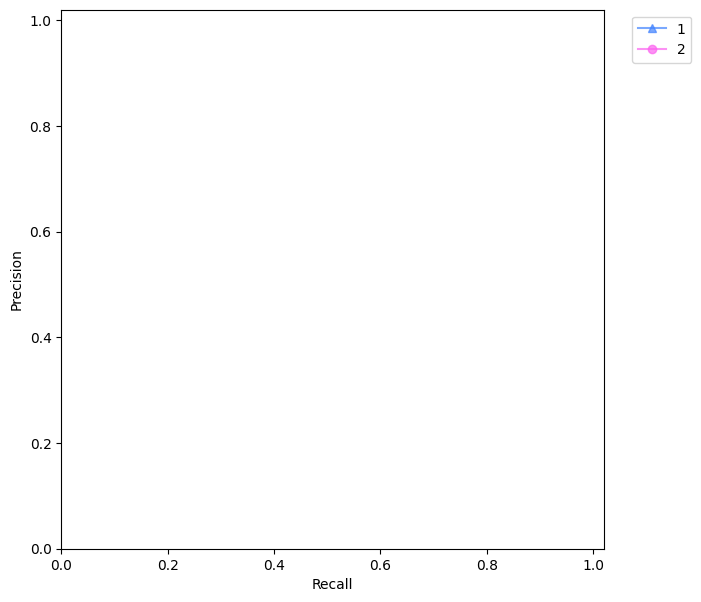

In [ ]:
%matplotlib inline
from animaloc.vizual import PlotPrecisionRecall
pr_curve = PlotPrecisionRecall(legend=True)
metrics = evaluator._stored_metrics
for c in range(1, metrics.num_classes):
    rec, pre = metrics.rec_pre_lists(c)
    pr_curve.feed(rec, pre, str(c))

pr_curve.plot()

Copy of the weight of DLA encoder toward HerdNet:

In [ ]:
from animaloc.models import HerdNet
# Load the checkpoint
checkpoint = torch.load('/content/output/best_model.pth')

# Update the model parameters
dla_encoder.load_state_dict(checkpoint['model_state_dict'])
herdnet = HerdNet(num_classes=num_classes, down_ratio=down_ratio).cuda()
import copy

herdnet.base_0= copy.deepcopy(dla_encoder.model.base_0)

In [ ]:
!pip install -U hydra-core wandb
%env HYDRA_FULL_ERROR=1
# !python /content/HerdNet/tools
!python /content/HerdNet/tools/train.py -m train=my_herdnet

env: HYDRA_FULL_ERROR=1
/content/HerdNet/tools/train.py:222: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='../configs', config_name="config")
Traceback (most recent call last):
  File "/content/HerdNet/tools/train.py", line 405, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/hydra/main.py", line 94, in decorated_main
    _run_hydra(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 394, in _run_hydra
    _run_app(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 465, in _run_app
    run_and_report(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 223, in run_and_report
    raise ex
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 220, in run_and_report
    return func()
  File "/usr/local/lib/python3.10/dist-pac

# Utilisation de fichiers de configuration avec Hyrda

In [ ]:
# Train config file
%%writefile /content/HerdNet/configs/train/my_herdnet.yaml
wandb_project: 'herdnet'
wandb_entity: 'wildlife-monitoring'
wandb_run: 'myrun'
seed: 1
device_name: 'cuda'

model:
  name: 'HerdNet'
  from_torchvision: False
  load_from: null
  resume_from: null
  kwargs:
    num_layers: 34
    pretrained: True
    down_ratio: 2
    head_conv: 64
  freeze: null

losses:
  FocalLoss:
    print_name: 'focal_loss'
    from_torch: False
    output_idx: 0
    target_idx: 0
    lambda_const: 1.0
    kwargs:
      reduction: 'mean'
      normalize: False
  CrossEntropyLoss:
    print_name: 'ce_loss'
    from_torch: True
    output_idx: 1
    target_idx: 1
    lambda_const: 1.0
    kwargs:
      reduction: 'mean'
      weight: [weight: [0.1,5.,15.,1.]

datasets:
  img_size: [512,512]
  anno_type: 'point'
  num_classes: 2
  collate_fn: null

  class_def:
    1: 'caribou'

  train:
    name: 'CSVDataset'
    csv_file: '/content/drive/MyDrive/Train_patches/gt.csv'
    root_dir: '/content/drive/MyDrive/Train_patches'

    sampler: null

    albu_transforms:
      HorizontalFlip:
        p: 0.5
      MotionBlur:
        p: 0.5
      Normalize:
        p: 1.0

    end_transforms:
      MultiTransformsWrapper:
        FIDT:
          num_classes: ${train.datasets.num_classes}
          down_ratio: ${train.model.kwargs.down_ratio}
        PointsToMask:
          radius: 2
          num_classes: ${train.datasets.num_classes}
          squeeze: True
          down_ratio: 32

  validate:
    name: 'CSVDataset'
    csv_file: '/content/drive/MyDrive/val_patches/gt.csv'
    root_dir: '/content/drive/MyDrive/val_patches'

    albu_transforms:
      Normalize:
        p: 1.0

    end_transforms:
      DownSample:
        down_ratio: ${train.model.kwargs.down_ratio}
        anno_type: ${train.datasets.anno_type}

training_settings:
  trainer: 'Trainer'
  valid_freq: 1
  print_freq: 100
  batch_size: 8
  optimizer: 'adam'
  lr: 1e-4
  weight_decay: 0.0005
  auto_lr:
    mode: 'max'
    patience: 10
    threshold: 1e-4
    threshold_mode: 'rel'
    cooldown: 10
    min_lr: 1e-6
    verbose: True
  warmup_iters: 100
  vizual_fn: null
  epochs: 100
  evaluator:
    name: 'HerdNetEvaluator'
    threshold: 5
    select_mode: 'max'
    validate_on: 'f1_score'
    kwargs:
      print_freq: 10
      lmds_kwargs:
        kernel_size: [3,3]
        adapt_ts: 0.3
  stitcher:
    name: 'HerdNetStitcher'
    kwargs:
      overlap: 0
      down_ratio: ${train.model.kwargs.down_ratio}
      up: False
      reduction: 'mean'

Writing /content/HerdNet/configs/train/my_herdnet.yaml


In [ ]:
# TEST config files
%%writefile /content/HerdNet/configs/test/my_herdnet.yaml
wandb_project: 'HerdNet'
wandb_entity: 'wildlife-monitoring'
wandb_run: 'myrun'
device_name: 'cuda'

model:
  name: 'HerdNet'
  from_torchvision: False
  pth_file: '/content/drive/MyDrive/output/best_model.pth'
  kwargs:
    num_layers: 34
    pretrained: False
    down_ratio: 2
    head_conv: 64

dataset:
  img_size: [512,512]
  anno_type: 'point'
  num_classes: 1
  collate_fn: null

  class_def:
    1: 'caribou'


  name: 'CSVDataset'
  csv_file: '/content/drive/MyDrive/test_patches/gt.csv'
  root_dir: '/content/drive/MyDrive/test_patches'

  mean: [0.485, 0.456, 0.406]
  std: [0.229, 0.224, 0.225]

evaluator:
  name: 'HerdNetEvaluator'
  threshold: 5
  kwargs:
    lmds_kwargs:
      kernel_size: [3,3]
      adapt_ts: 0.3

stitcher:
  name: 'HerdNetStitcher'
  kwargs:
    overlap: 160
    down_ratio: ${test.model.kwargs.down_ratio}
    up: False
    reduction: 'mean'

Writing /content/HerdNet/configs/test/my_herdnet.yaml


In [ ]:

if wandb.run is not None:
  wandb.finish()
!python /content/HerdNet/tools/train.py -m train=my_herdnet



accuracy,▁▇▁▇█▁▃▁▁▁▁██
bce_loss,█▄▄▂▄▂▆▂▂▄▃▁▂▂▂▂▃▂▃▃▃▂▂▃▂▂▁▂▄▁▅▁▃▂▄▂▂▁▆▂
epoch,▁▁▂▂▂▂▃▃▃▃▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▃▂▂▃▂▅▃▃▂▁▂▁
accuracy,0.9823
bce_loss,0.00891
epoch,13
lr,0.0001
train_loss,0.03395


/content/HerdNet/tools/train.py:222: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='../configs', config_name="config")
Traceback (most recent call last):
  File "/content/HerdNet/tools/train.py", line 405, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/hydra/main.py", line 94, in decorated_main
    _run_hydra(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 394, in _run_hydra
    _run_app(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 465, in _run_app
    run_and_report(
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 223, in run_and_report
    raise ex
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/utils.py", line 220, in run_and_report
    return func()
  File "/usr/local/lib/python3.10/dist-packages/hydra/_internal/ut

python3: can't open file '/content/foo.py': [Errno 2] No such file or directory


In [ ]:
!python /content/HerdNet/tools/test.py -m test=my_herdnet

/content/HerdNet/tools/test.py:129: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='../configs', config_name="config")
[2023-08-04 22:24:53,380][HYDRA] Launching 1 jobs locally
[2023-08-04 22:24:53,381][HYDRA] 	#0 : test=my_herdnet
/usr/local/lib/python3.10/dist-packages/hydra/_internal/core_plugins/basic_launcher.py:74: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
wandb: Currently logged in as: ghazaleh-serati. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.8
wandb: Run data is saved locally in /content/multirun/2023-08-04/22-24-53/0/wandb/run-20230804_222453-9ldhzx6l
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run zesty-dream